In [1]:
!pip install matplotlib seaborn pandas pyspark

  Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, when, desc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Student Performance Analysis") \
    .getOrCreate()

In [4]:
spark = SparkSession.builder \
    .appName("StudentPerformanceAnalysis") \
    .getOrCreate()

spark

In [6]:
df = spark.read.csv("C:/spark/datasets/student_performance.csv", header=True, inferSchema=True)
df.show(5)

+----------+-----------------------+---------------------+-------------------+-----------+-----+
|student_id|weekly_self_study_hours|attendance_percentage|class_participation|total_score|grade|
+----------+-----------------------+---------------------+-------------------+-----------+-----+
|         1|                   18.5|                 95.6|                3.8|       97.9|    A|
|         2|                   14.0|                 80.0|                2.5|       83.9|    B|
|         3|                   19.5|                 86.3|                5.3|      100.0|    A|
|         4|                   25.7|                 70.2|                7.0|      100.0|    A|
|         5|                   13.4|                 81.9|                6.9|       92.0|    A|
+----------+-----------------------+---------------------+-------------------+-----------+-----+
only showing top 5 rows


In [7]:
df.printSchema()
df.describe().show()

root
 |-- student_id: integer (nullable = true)
 |-- weekly_self_study_hours: double (nullable = true)
 |-- attendance_percentage: double (nullable = true)
 |-- class_participation: double (nullable = true)
 |-- total_score: double (nullable = true)
 |-- grade: string (nullable = true)

+-------+------------------+-----------------------+---------------------+-------------------+------------------+-------+
|summary|        student_id|weekly_self_study_hours|attendance_percentage|class_participation|       total_score|  grade|
+-------+------------------+-----------------------+---------------------+-------------------+------------------+-------+
|  count|           1000000|                1000000|              1000000|            1000000|           1000000|1000000|
|   mean|          500000.5|     15.029126899999985|            84.711046|  5.985202600000013| 84.28384530000004|   NULL|
| stddev|288675.27893234405|      6.899431021167231|      9.4241433849641|  1.956420508105157|15.43296

In [9]:
# Total students
print("Total Students:", df.count())

# Group by grade (instead of gender)
grade_group = df.groupBy("grade").agg(avg("total_score").alias("Average_Score"), count("*").alias("Count"))
grade_group.show()

# Group by class participation level (rounded for grouping)
participation_group = df.groupBy("class_participation").agg(avg("total_score").alias("Average_Score"))
participation_group.show()

# Filter top performers (Score > 90)
top_students = df.filter(col("total_score") > 90)
top_students.show(5)

Total Students: 1000000
+-----+------------------+------+
|grade|     Average_Score| Count|
+-----+------------------+------+
|    F|  35.4741457124436|  6204|
|    B| 77.94658989673604|258174|
|    D|49.380345793146375| 44998|
|    C|63.564523876602465|141980|
|    A| 96.04237520140578|548644|
+-----+------------------+------+

+-------------------+-----------------+
|class_participation|    Average_Score|
+-------------------+-----------------+
|                2.4|84.43241574479032|
|                8.0|84.42638923292876|
|                0.0|84.33204225352115|
|                5.4| 84.3076810227392|
|                7.0|84.31792027924774|
|                3.5|84.19316960859557|
|                6.1|84.34765399605203|
|                9.5|84.56562792877229|
|                7.7|84.08008390216152|
|                0.2|84.03848684210526|
|                6.6|84.32903869375754|
|                8.7|84.02672079950032|
|                2.9|84.60389389559597|
|                3.7|84.20217

In [11]:
pdf = df.limit(10000).toPandas()
pdf.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


C:\Users\sures\AppData\Local\Temp\ipykernel_16132\1126407742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grade', y='total_score', data=pdf, estimator='mean', errorbar=None, palette='viridis')


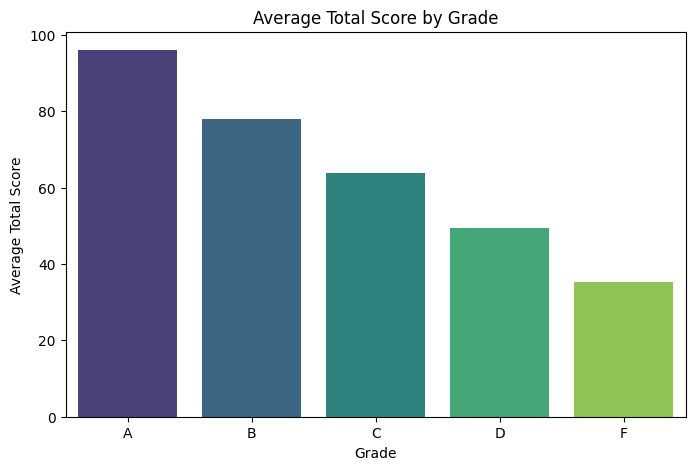

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x='grade', y='total_score', data=pdf, estimator='mean', errorbar=None, palette='viridis')
plt.title('Average Total Score by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Total Score')
plt.show()

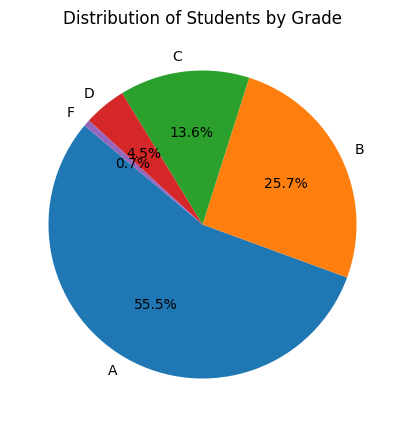

In [17]:
grade_counts = pdf['grade'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Students by Grade')
plt.show()

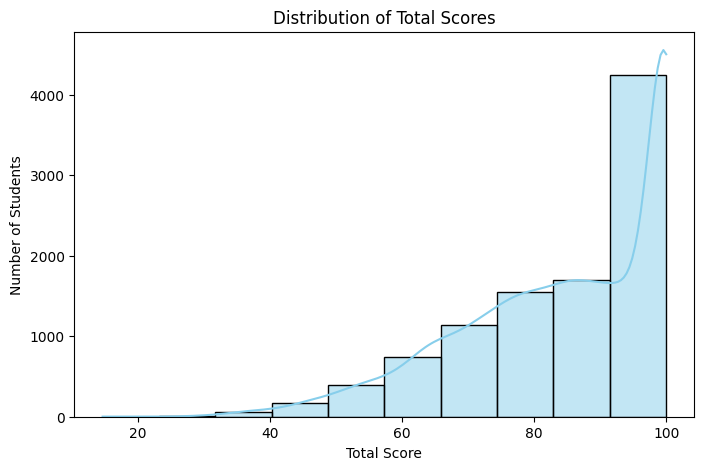

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(pdf['total_score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
plt.show()

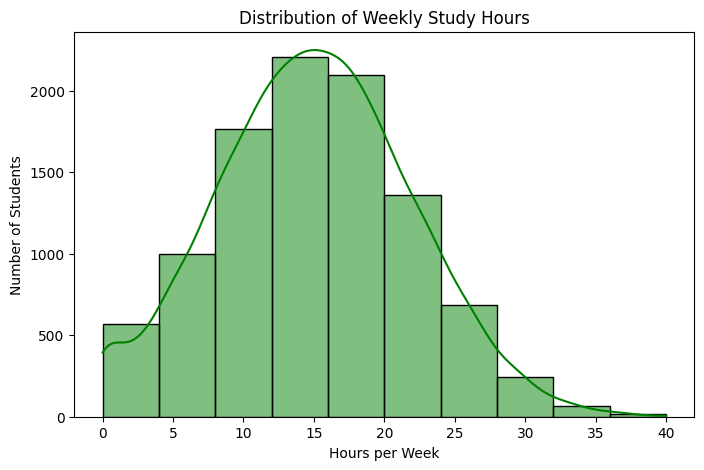

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(pdf['weekly_self_study_hours'], bins=10, kde=True, color='green')
plt.title('Distribution of Weekly Study Hours')
plt.xlabel('Hours per Week')
plt.ylabel('Number of Students')
plt.show()

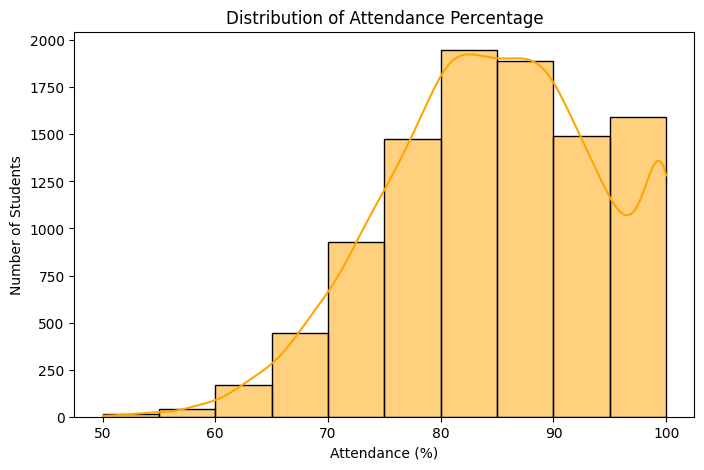

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(pdf['attendance_percentage'], bins=10, kde=True, color='orange')
plt.title('Distribution of Attendance Percentage')
plt.xlabel('Attendance (%)')
plt.ylabel('Number of Students')
plt.show()

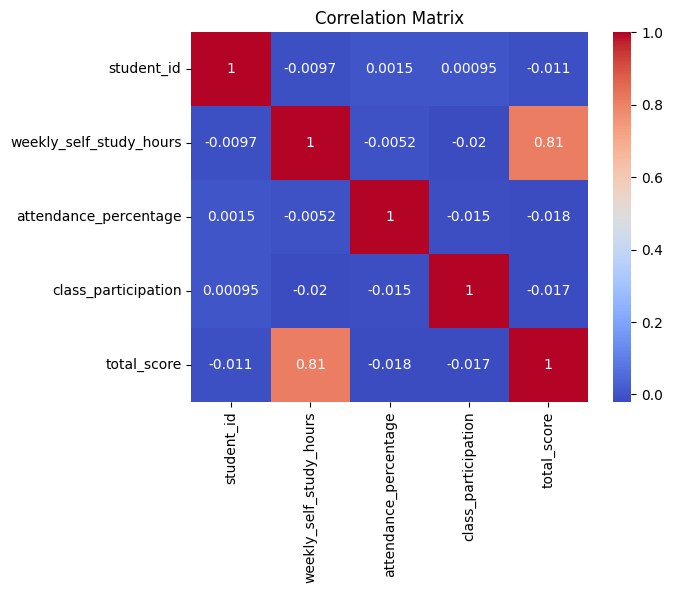

In [23]:
corr = pdf.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()